# Job Change of Data Scientists | Data Science Project

> Data from [Kaggle](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists) with modification in problem context.

*This project was completed as a part of Rakamin Academy Data Science Bootcamp.*

Ascencio, a leading Data Science agency, offers training courses to companies to enhance their employees' skills. Companies want to predict which employees are **unlikely to seek a job change** after completing the course, as well as identify those who are **likely to finish it quickly**. By focusing on employees who are committed to staying and can contribute sooner, Ascencio helps companies optimize their training investments.

To achieve this, Ascencio will build two machine learning models: one to predict the training hours needed for an employee to complete the course, and another to predict whether an employee will seek a job change or not.

# Prepare Everything!

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('matplotlib version : ',mpl.__version__)
print('seaborn version : ',sns.__version__)

Mounted at /content/drive
numpy version :  1.26.4
pandas version :  2.2.2
matplotlib version :  3.8.0
seaborn version :  0.13.2


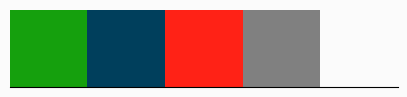

In [ ]:
# color palette
green = '#15a00d'
blue = '#003f5c'
red = '#ff2216'
gray = 'gray'
bg_color = '#fbfbfb'
sns.palplot([green,blue,red,gray,bg_color])

In [ ]:
# default setting
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.facecolor"] = bg_color
plt.rcParams["axes.facecolor"] = bg_color
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['axes.axisbelow'] = True

# Exploring the Data!

In [ ]:
# read the data
df_train = pd.read_csv('/content/drive/MyDrive/Finpro Rakamin/Data/aug_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Finpro Rakamin/Data/aug_test.csv')



> **Column List of this Dataset**

1. enrollee_id : Unique ID for employee
2. city: City code of company
3. city_ development _index : Developement index of the city (scaled)
4. gender: Gender of employee
5. relevent_experience: Relevant experience of employee in Data Science
6. enrolled_university: Type of University course enrolled now if any
7. education_level: Education level of employee
8. major_discipline: Education major discipline of employee
9. experience: employee total experience in years
10. company_size: No of employees in current employer's company
11. company_type: Type of current employer's company
12. last_new_job: Difference in years between previous job and current job of employee
13. training_hours: training hours completed
14. target: 0 – Not looking for job change, 1 – Looking for a job change



## General Exploration

### A. Overview Data

In [ ]:
# show train data
print("TRAIN DATA")
display(df_train.sample(3))
print(f"Rows numbers: {df_train.shape[0]}")
print(f"Columns numbers: {df_train.shape[1]}")

TRAIN DATA


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
9198,20122,city_103,0.92,NaN,Has relevent experience,NaN,Graduate,STEM,10,NaN,NaN,1,23,1.0
2764,30723,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,1000-4999,NGO,1,15,0.0
6613,11197,city_103,0.92,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,1,41,0.0


Rows numbers: 19158
Columns numbers: 14


In [ ]:
# show test data
print("TEST DATA")
display(df_test.sample(3))
print(f"Rows numbers: {df_test.shape[0]}")
print(f"Columns numbers: {df_test.shape[1]}")

TEST DATA


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1287,23172,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,10000+,Pvt Ltd,1,103
1764,2610,city_1,0.847,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,9
538,14158,city_103,0.920,NaN,Has relevent experience,no_enrollment,Masters,STEM,9,NaN,NaN,1,18


Rows numbers: 2129
Columns numbers: 13


In [ ]:
# show the difference of columns in both data
col_train = df_train.columns.tolist()
col_test = df_test.columns.tolist()
col_diff = list(set(col_train) - set(col_test))
print(f"1. Test Data doesn't have {col_diff} column, while Train Data have")

# show the percentage difference of data size
size_diff = df_test.shape[0]/df_train.shape[0]*100
print(f"2. Test Data size only have about {np.round(size_diff,2)}% of Train Data size")

1. Test Data doesn't have ['target'] column, while Train Data have
2. Test Data size only have about 11.11% of Train Data size


Notes:<br>Since Test Data doesn't have 'target' column and only about 11.11% of Train Data size, we will only explore Train Data for efficiency.

### B. Type Data

In [ ]:
# check data type
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Notes:<br>
1. 'enrollee_id' column should have string type
2. 'target' column should have boolean type.

In [ ]:
# change it
df_train['enrollee_id'] = df_train['enrollee_id'].astype(str)
df_train['target'] = df_train['target'].astype(bool)

# verify the changes
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  object 
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  bool   
dtypes: bool(1), float64(1), int64(1), obje

In [ ]:
# divide categorical and numerical columns
cats = df_train.select_dtypes(include=['object','bool']).columns.tolist()
nums = df_train.select_dtypes(exclude=['object','bool']).columns.tolist()

print(f"Categorical Columns: {cats}")
print(f"Numerical Columns: {nums}")

Categorical Columns: ['enrollee_id', 'city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']
Numerical Columns: ['city_development_index', 'training_hours']


### C. Describe Data

In [ ]:
# describe categorical data
display(df_train[cats].describe())

,enrollee_id,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
count,19158,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158
unique,19158,123,3,2,3,5,6,22,8,6,6,2
top,8949,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,False
freq,1,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040,14381


Notes:<br>
1. 'enrollee_id' have distinct value. It shows that this column is primary key. We will drop this column in data preprocessing.
2. Based on freq/count, we can see many columns have imbalance data. We need to do grouping or SMOTE in data preprocessing later.
3. This dataset have many missing values, we need to explore it too.

In [ ]:
# describe numerical data
display(df_train[nums].describe())

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Notes:
1. There are no missing data in numerical columns
2. There are differences between mean and median in both numerical columns, we may excpect to not see normal distribution
3. In 'city_development_index' based on quartile value, we can see outlier in left side/negative side since min value is much lower than mean based on std difference
4. In 'training_hours' based on quartile value, we can see outlier in right side/positive side since max value is much higher than mean based on std difference

### D. Missing Value

In [ ]:
# check missing value
miss_perc = df_train.isna().sum()/df_train.shape[0]*100
miss = pd.DataFrame({'Missing Count': df_train.isna().sum(),
                     'Missing %': np.round(miss_perc,2)}).sort_values('Missing %', ascending=False)
display(miss)

# check how many rows will be delete if we using dropna
rows_if_dropna = df_train.dropna()
print(f"Rows will be delete if we using dropna is {rows_if_dropna.shape[0]} rows or {np.round(100 - rows_if_dropna.shape[0]/df_train.shape[0]*100,2)}% of total train data")

,Missing Count,Missing %
company_type,6140,32.05
company_size,5938,30.99
gender,4508,23.53
major_discipline,2813,14.68
education_level,460,2.40
last_new_job,423,2.21
enrolled_university,386,2.01
experience,65,0.34
enrollee_id,0,0.00
city,0,0.00


Rows will be delete if we using dropna is 8955 rows or 53.26% of total train data


In [ ]:
# check rows with equal or more than 4 NaN values
rows_with_many_nulls = df_train[df_train.isnull().sum(axis=1) >= 4]
display(rows_with_many_nulls.sample(3))
print(f"Rows with equal or more than 4 NaN value is {rows_with_many_nulls.shape[0]} rows or {np.round(rows_with_many_nulls.shape[0]/df_train.shape[0]*100,2)}% of total train data")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3428,5221,city_10,0.895,Male,Has relevent experience,NaN,NaN,NaN,>20,NaN,NaN,>4,146,False
14346,2913,city_21,0.624,Male,No relevent experience,no_enrollment,NaN,NaN,1,NaN,NaN,never,61,True
14026,5883,city_114,0.926,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,NaN,92,False


Rows with equal or more than 4 NaN value is 878 rows or 4.58% of total train data


Notes:
1. There are so many (>50% total train data) that have rows with missing value. We cannot drop it since it will delete more than half of our data.
2. We will imputation data using LGBM Clasifier for categorical column and LGBM regresion for numerical column
3. Before we imputate data with ML model, we will see in next section if major_discipline with NaN value can be replace with 'No Major' if education_level is below Graduate
4. We will drop rows with equal or more than 4 null values since it have little proportion with total train data (<5% total train data). It will make ML model have better features for imputate missing value.

### E. Duplicate Data

In [ ]:
# check duplicate data
dup_perc = df_train.duplicated().sum()/df_train.shape[0]*100
print(f"Duplicate Rows: {df_train.duplicated().sum()} row")

Duplicate Rows: 0 row


Notes:
1. Hooray!

### F. Value Count

In [ ]:
# categorical value count
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom enrollee_id:
enrollee_id
8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: count, Length: 19158, dtype: int64

Value count kolom city:
city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

Value count kolom gender:
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

Value count kolom relevent_experience:
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

Value count kolom enrolled_university:
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

Value count kolom education_level:
education_level
Graduate          11598
Masters            4361
High School    

Notes:
1. enrolle_id will be drop since it just unique identifiers.
2. city will be drop since it has too many unique values (123 values). Moreover, city_development_index can convey more necessary information than city.
3. We will change relevent_experience to relevant_experience and change dtype to boolean (True, False)
3. We can grouping major_discipline value to STEM, Non-STEM, and No Major
4. We can grouping experience to Early Career (<1-4 years), Mid Career (5-10 years), Senior Career (11-15 years), and High Experience (>15 Years)
5. We can grouping company_size to Small Company (<100), Medium Company (100-999), Large Company (1000-9999), and Very Large Company (>10000)
6. We will use One-Hot Encoding for gender (3 features), major_discipline (3 features), and company_type (6 features)
7. We will use Label Endoding for relevent_experience, enrolled_university, education_level, experience, company_size, and last_new_job (6 features)
8. We will get 3+3+6+6 = 18 categorical features for ML model.

In [ ]:
# numerical value count
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom city_development_index:
city_development_index
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: count, Length: 93, dtype: int64

Value count kolom training_hours:
training_hours
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: count, Length: 241, dtype: int64



Notes:
1. We will have 1 numerical features if we want predict training_hours and we will have 2 numerical features if we want predict target
2. Total we have 19-20 features to play along

### Additional

From this dataset, logically, we can think about correlation between education_level and major_discipline:
1. If education_level is below Graduate, then there is No Major in major_discipline
2. If education_level is over High School, then there is ***no*** of No Major in major_discipline

We need to check this!

In [ ]:
# check if education_level below Graduate have No Major in major_discipline
sum_na_below_grad = df_train[df_train['education_level'].isin(['High School','Primary School'])]['major_discipline'].isna().sum()
total_below_grad = df_train[df_train['education_level'].isin(['High School','Primary School'])].shape[0]
print(f"NaN values in major_discipline of employee with education_level below Graduate is {sum_na_below_grad} values or {sum_na_below_grad/total_below_grad*100}%")

NaN values in major_discipline of employee with education_level below Graduate is 2325 values or 100.0%


This is correct! <br>If education_level is below Graduate, then there is No Major in major_discipline

In [ ]:
# check if education_level over High School have No Major in major_discipline
sum_no_major_over_hs = df_train[(df_train['education_level'].isin(['Graduate','Masters','Phd']) & (df_train['major_discipline'] == 'No Major'))]['major_discipline'].count()
total_over_hs = df_train[(df_train['education_level'].isin(['Graduate','Masters','Phd']))].shape[0]
print(f"No Major in major_discipline of employee with education_level over High School is {sum_no_major_over_hs} values or {np.round(sum_no_major_over_hs/total_over_hs*100,2)}%")

No Major in major_discipline of employee with education_level over High School is 223 values or 1.36%


This is wrong!
<br>If the education level is above High School, then it doesn't make sense to have No Major in major_discipline. It shows that this discrepancy likely indicates incorrect or inconsistent data. To address this, we will replace the "No Major" entries with NaN values, allowing us to impute the missing information using ML model later. However, before proceeding, we need to assess whether this adjustment will impact our previous analysis.

In [ ]:
# check if we change it major_discipline to NaN Values because we need to imputate it with ML
# do this will change analysis above?
df_exp = df_train.copy() # make a copy so original train data is not affected
print(f"Rows of education_level over High School with NaN Value before change: {df_exp.loc[(df_exp['education_level'].isin(['Graduate','Masters','Phd'])), 'major_discipline'].isna().sum()} rows")
df_exp.loc[(df_exp['education_level'].isin(['Graduate','Masters','Phd']) & (df_exp['major_discipline'] == 'No Major')), 'major_discipline'] = np.nan
print(f"Rows of education_level over High School with NaN Value after change: {df_exp.loc[(df_exp['education_level'].isin(['Graduate','Masters','Phd'])), 'major_discipline'].isna().sum()} rows")

print("")

# check rows with equal or more than 4 NaN values
rows_with_many_nulls_exp = df_exp[df_exp.isnull().sum(axis=1) >= 4]
print(f"Rows with equal pr more than 4 NaN value before change is {rows_with_many_nulls.shape[0]} rows or {np.round(rows_with_many_nulls.shape[0]/df_train.shape[0]*100,2)}% of total train data")
print(f"Rows with equal or more than 4 NaN value after change is {rows_with_many_nulls_exp.shape[0]} rows or {np.round(rows_with_many_nulls_exp.shape[0]/df_exp.shape[0]*100,2)}% of total train data")

Rows of education_level over High School with NaN Value before change: 28 rows
Rows of education_level over High School with NaN Value after change: 251 rows

Rows with equal pr more than 4 NaN value before change is 878 rows or 4.58% of total train data
Rows with equal or more than 4 NaN value after change is 893 rows or 4.66% of total train data


As shown above, rows with equal or more than 4 NaN values can still be drop since it have little proportion to total data (<5% total data) so this change is not alter our previous analysis

## Univariate Analysis


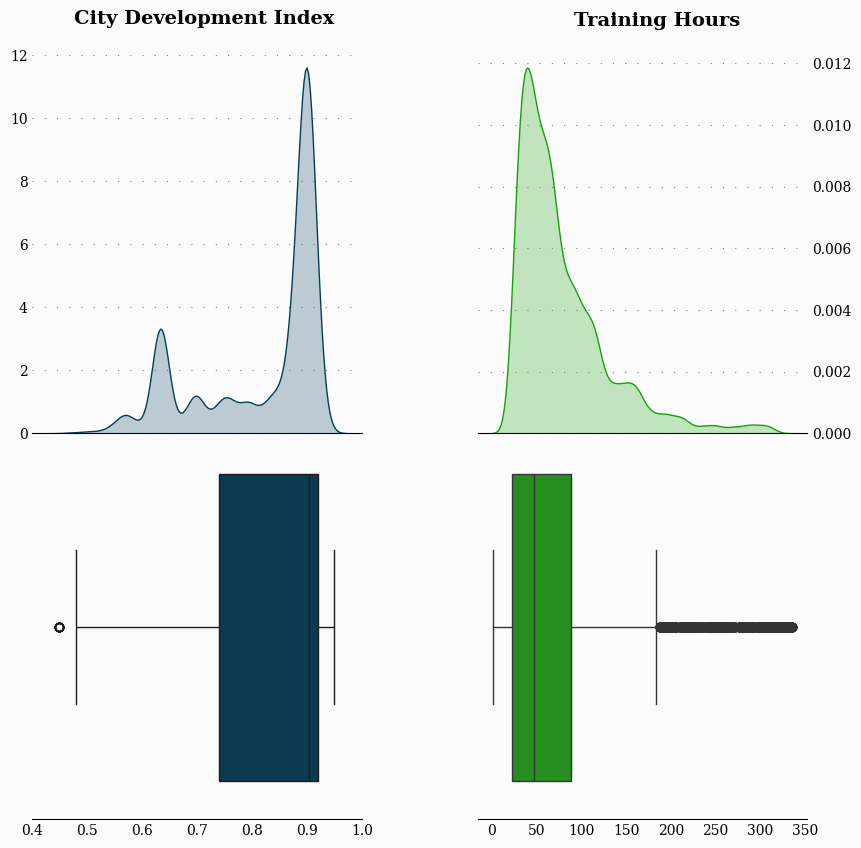

In [ ]:
# KDE Plot and Boxplot for numerical columns
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.35, hspace=0.005)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# ax0 - KDE Plot - CDI
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax0.text(0.45, 13, 'City Development Index', size=14, weight='bold')
sns.kdeplot(df_train[nums[0]], ax=ax0, color=blue, shade=True)

ax0.set_xticks([])
ax0.set_ylabel('')
ax0.set_xlabel('')

# ax1 - KDE Plot - Training Hours
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax1.text(80, 0.0132, 'Training Hours', size=14, weight='bold')
sns.kdeplot(df_train[nums[1]], ax=ax1, color=green, shade=True)

ax1.yaxis.tick_right()
ax1.set_xticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

# ax2 - Box Plot - CDI
sns.boxplot(x=df_train[nums[0]], ax=ax2, color=blue)

ax2.xaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax2.set_xlim(0.4,1)
ax2.set_ylabel('')
ax2.set_xlabel('')

# ax3 - Box Plot - Training Hours
sns.boxplot(x=df_train[nums[1]], ax=ax3, color=green)

ax3.xaxis.set_major_locator(mtick.MultipleLocator(50))
ax3.set_ylabel('')
ax3.set_xlabel('')

plt.show()

Notes:
1. city_development_index have multimodal distribution, it may need to clustering using KMeans clustering and grouping based on that.
2. Only one outlier detected by IQR in city_development_index, we can easily drop it
2. training_hours have positively-skewed distribution, we can use log-transformation for feature transformation
3. There are so many outlier in training_hours, we need to check it further after apply log-transformation

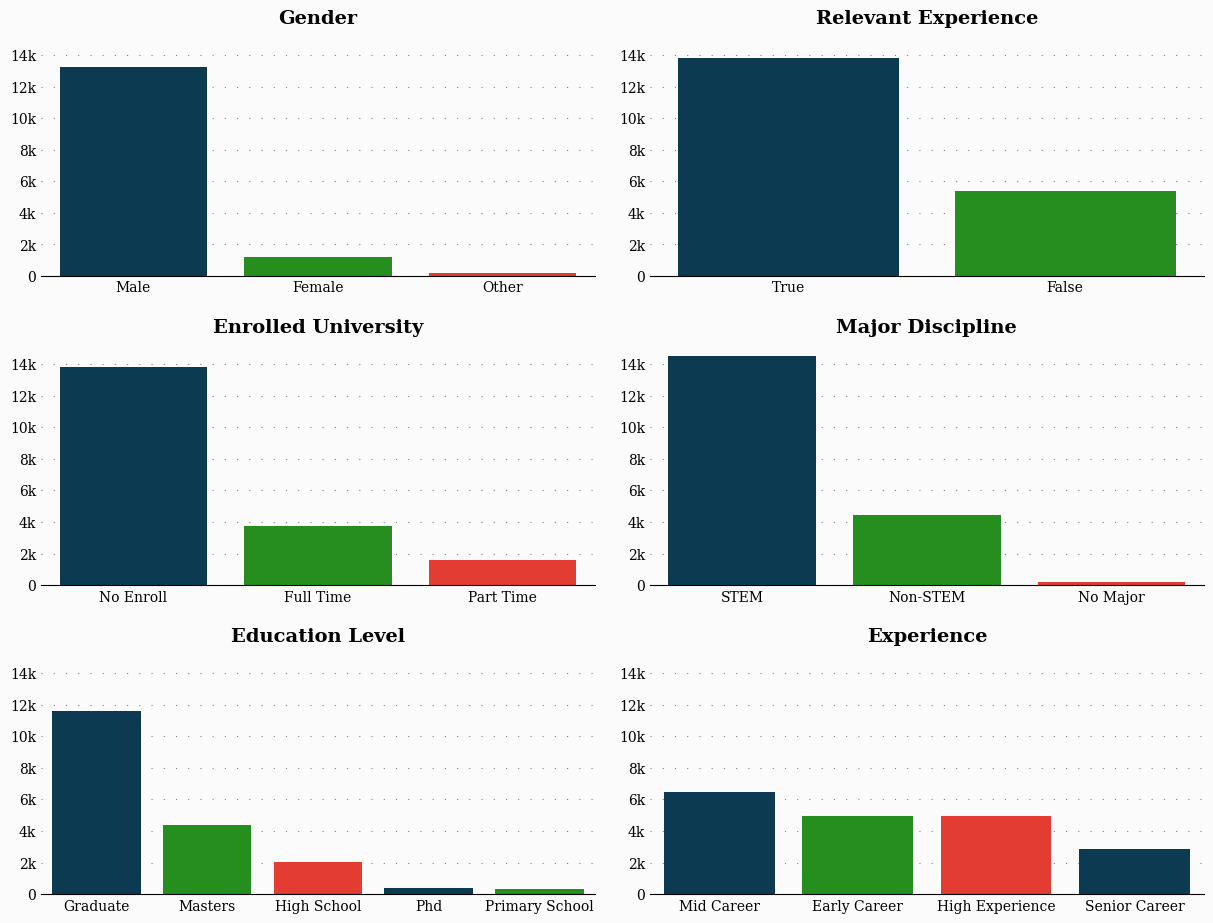

In [ ]:
# make new categorical column to visualize, we don't check column that we don't use later
cats2 = cats[2:].copy() # drop enrollee_id and city

# create funcformatter for 1000 to 1k
def thousands_formatter(x, pos):
  if x < 1000:
    return f'{int(x)}'
  else:
    return f'{int(x/1000)}k'

# Count Plot for categorical columns
fig = plt.figure(figsize=(15,11))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.1, hspace=0.35)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# ax0 - Count Plot - Gender
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax0.text(1, 16000, 'Gender', size=14, weight='bold', horizontalalignment = 'center')
sns.countplot(x=df_train[cats2[0]], ax=ax0, palette=[blue,green,red])

ax0.yaxis.set_major_locator(mtick.MultipleLocator(2000))
ax0.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax0.set_ylim(0,14500)

# ax1 - Count Plot - Relevent Experience
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax1.text(0.5, 16000, 'Relevant Experience', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[1]].apply(lambda x: True if x == "Has relevent experience" else False)
sns.countplot(x=df, ax=ax1, palette=[blue,green,red], order=df.value_counts().index)

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylim(0,14500)
# ax1.set_yticklabels([])

# ax2 - Count Plot - Enrolled University
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax2.text(1, 16000, 'Enrolled University', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[2]].apply(lambda x: "No Enroll" if x == "no_enrollment"
                              else "Full Time" if x == "Full time course" else "Part Time")
sns.countplot(x=df, ax=ax2, palette=[blue,green,red], order=df.value_counts().index)

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim(0,14500)

# ax3 - Count Plot - Education Level
ax3.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax3.text(1, 16000, 'Major Discipline', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[4]].apply(lambda x: "STEM" if x == "STEM"
                              else "No Major" if x == "No Major" else "Non-STEM")
sns.countplot(x=df, ax=ax3, palette=[blue,green,red], order=df.value_counts().index)

ax3.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylim(0,14500)
# ax3.set_yticklabels([])

# ax4 - Count Plot - Education Level
ax4.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax4.text(2, 16000, 'Education Level', size=14, weight='bold', horizontalalignment = 'center')
sns.countplot(x=df_train[cats2[3]], ax=ax4, palette=[blue,green,red], order=df_train[cats2[3]].value_counts().index)

ax4.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.set_ylim(0,14500)

# ax5 - Count Plot - Experience
ax5.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax5.text(1.5, 16000, 'Experience', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[5]].apply(lambda x: "Early Career" if x in ['<1','1','2','3','4']
                              else "Mid Career" if x in ['5','6','7','8','9','10']
                              else "Senior Career" if x in ['11','12','13','14','15']
                              else "High Experience")
sns.countplot(x=df, ax=ax5, palette=[blue,green,red], order=df.value_counts().index)

ax5.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax5.set_ylabel('')
ax5.set_xlabel('')
ax5.set_ylim(0,14500)
# ax5.set_yticklabels([])

plt.show()

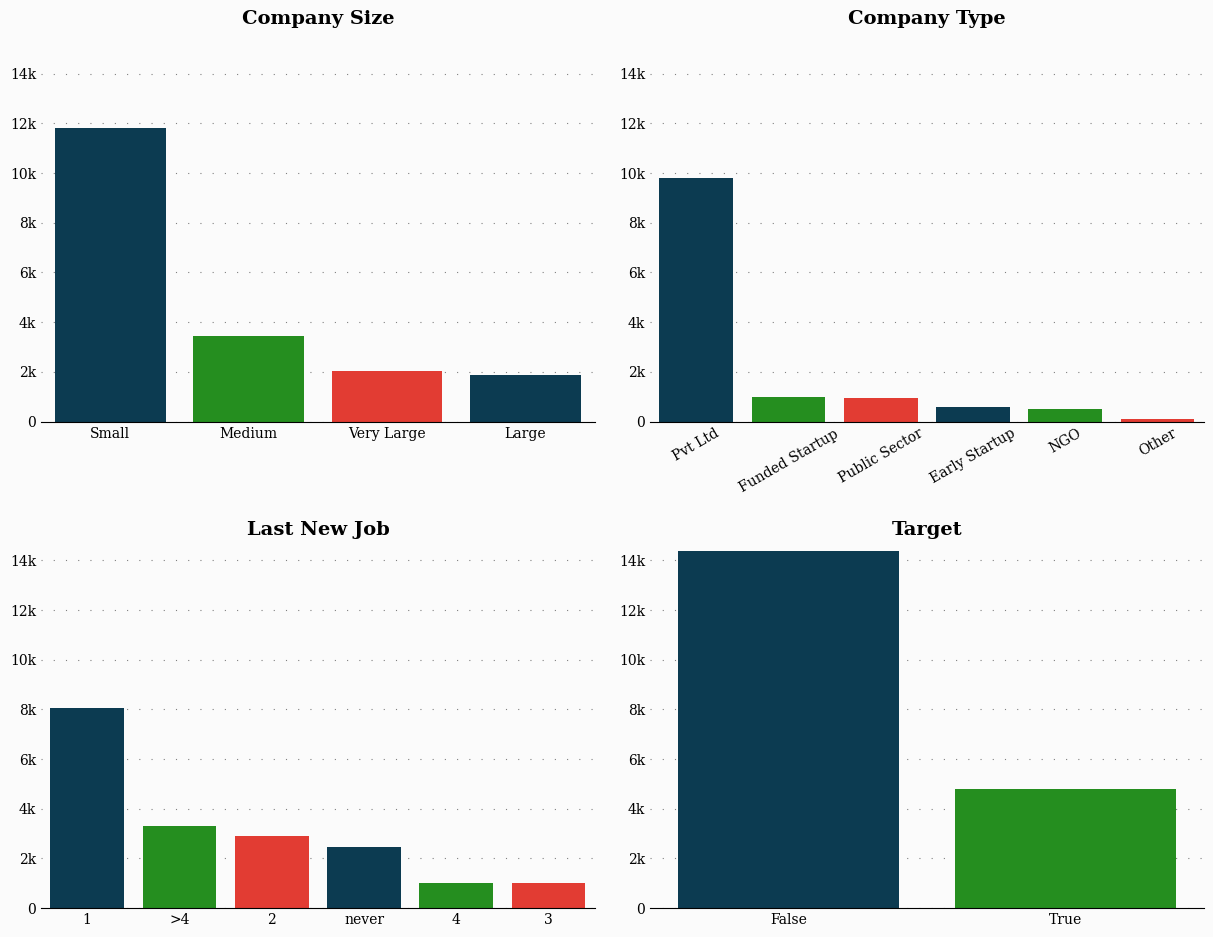

In [ ]:
# Count Plot for categorical columns
fig = plt.figure(figsize=(15,11))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.1, hspace=0.35)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# ax0 - Count Plot - Company Size
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax0.text(1.5, 16000, 'Company Size', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[6]].apply(lambda x: "Medium" if x in ['100-500', '500-999']
                              else "Large" if x in ['1000-4999', '5000-9999']
                              else "Very Large" if x in ['10000+'] else "Small")
sns.countplot(x=df, ax=ax0, palette=[blue,green,red], order=df.value_counts().index)

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax0.set_ylim(0,14500)

# ax1 - Count Plot - Company Type
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax1.text(2.5, 16000, 'Company Type', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[7]].apply(lambda x: "Early Startup" if x == "Early Stage Startup" else x)
sns.countplot(x=df, ax=ax1, palette=[blue,green,red], order=df.value_counts().index)

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylim(0,14500)
ax1.set_xticklabels(labels=df.value_counts().index ,rotation=30)
# ax1.set_yticklabels([])

# ax2 - Count Plot - Last New Job
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax2.text(2.5, 15000, 'Last New Job', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[8]]
sns.countplot(x=df, ax=ax2, palette=[blue,green,red], order=df.value_counts().index)

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim(0,14500)

# ax3 - Count Plot - Target
ax3.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax3.text(0.5, 15000, 'Target', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[9]]
sns.countplot(x=df, ax=ax3, palette=[blue,green,red], order=df.value_counts().index)

ax3.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylim(0,14500)
# ax3.set_yticklabels([])

plt.show()

## Multivariate Analysis

<Axes: >

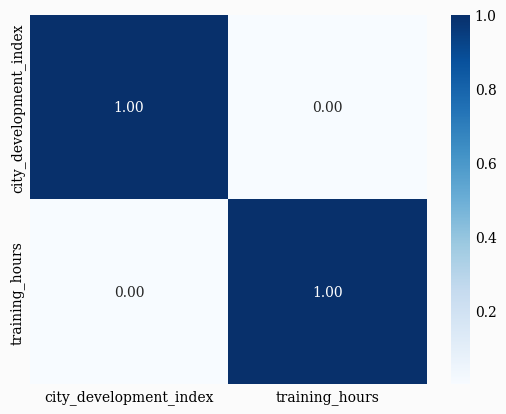

In [ ]:
sns.heatmap(df_train[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

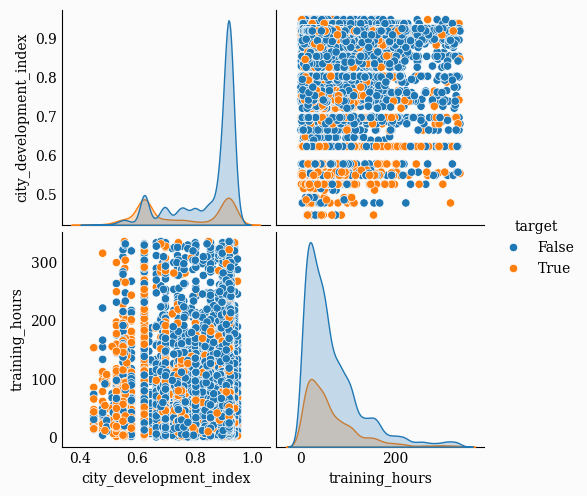

In [ ]:
sns.pairplot(df_train, hue='target')